In [1]:
cd /Users/bastus/Desktop/Forschungsprojekt/genimpro

/Users/bastus/Desktop/Forschungsprojekt/genimpro


In [2]:
%run importwrapper.py
%pylab inline
samplerate=44100.0

/Library/Python/2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [5]:
import json
def updateEditedCellsForRecording(recordingID):
    track1 = genimpro.recordings.getRecordingDetails(recordingID,printDetails=1)[4][0]
    track2 = genimpro.recordings.getRecordingDetails(recordingID,printDetails=1)[4][1]
    
    c.execute("select soundcells_edited from recordings where ID=%i" % (recordingID))
    values = c.fetchone()
    if values==None:
        raise Exception("No valid ID")

    cells = json.loads(values[0])
    editedCells1 = cells[0]
    editedCells2 = cells[1]
    
    if len(editedCells1)>0:
        sqlcommand = "DELETE FROM soundcells where trackID=%i" % (track1[3])
        c.execute(sqlcommand)
        db.commit()
        
        for cell in sorted(editedCells1):
            start = int(cell[0])  #sonicevents[sequence[0]]["start"]
            end = int(cell[1])  #sonicevents[sequence[-1]]["end"]
            events = ""
            sqlcommand = "INSERT INTO soundcells (trackID,start,end,events) values (%i,%i,%i,%s)" % (track1[3],start,end,repr(events))
            c.execute(sqlcommand)
            db.commit()

        print "Added %i cells for track %i" % (len(editedCells1),track1[3])
       
    
    if len(editedCells2)>0:
        sqlcommand = "DELETE FROM soundcells where trackID=%i" % (track2[3])
        c.execute(sqlcommand)
        db.commit()
        
        for cell in sorted(editedCells2):
            start = int(cell[0])  #sonicevents[sequence[0]]["start"]
            end = int(cell[1]) #sonicevents[sequence[-1]]["end"]
            events = ""
            sqlcommand = "INSERT INTO soundcells (trackID,start,end,events) values (%i,%i,%i,%s)" % (track2[3],start,end,repr(events))
            c.execute(sqlcommand)
            db.commit()

        print "Added %i cells for track %i" % (len(editedCells2),track2[3])        
    

In [8]:
import sqlite3 as lite

db = lite.connect('genImpro.db')
c = db.cursor() 
updateEditedCellsForRecording(256)

256 (../Testreihen/2015-10-17 Blind Date Aufnahmen/7 4 1713.aiff):
    Gerhard Schäfer (soprano saxophone): 3/91f65585-ac59-425c-93ee-4f482cf035a8.aiff
    Hans-Günter Brodmann (percussion): 3/f40b8b3b-2035-47ed-b8e4-836afdff05c5.aiff
256 (../Testreihen/2015-10-17 Blind Date Aufnahmen/7 4 1713.aiff):
    Gerhard Schäfer (soprano saxophone): 3/91f65585-ac59-425c-93ee-4f482cf035a8.aiff
    Hans-Günter Brodmann (percussion): 3/f40b8b3b-2035-47ed-b8e4-836afdff05c5.aiff
Added 26 cells for track 550
Added 21 cells for track 551


In [25]:
track = genimpro.recordings.getRecordingDetails(38,printDetails=1)[4][0]
audio = genimpro.recordings.getAudioForTrack(track)

38 (0003 A C.aiff):
    Martin Weigert (recorder): 2/81cdc61a-8502-4700-b7e1-1e7f5c4052ae.aiff
    Johanna Steinborn (recorder): 2/aee18a7c-4f2b-4c6c-bf70-99d919e4c6eb.aiff


In [41]:
cellBoundaries = getSoundcellsForTrack(track)

In [31]:
print cellBoundaries

[[206848, 483328], [689152, 791552], [1326763, 1848201], [1862656, 2163712], [2213888, 2243584], [2319360, 2348032], [2515968, 2793472], [2827264, 2959359], [3179520, 3210240], [3229696, 3249151], [3281920, 3445760], [3513344, 3518463], [3546112, 3553280], [3641343, 3665920], [3713024, 3776512], [3793920, 3864575], [3880960, 3906560], [3961856, 4036608], [4052992, 4063232], [4152320, 4461568], [4477952, 4599808], [4980736, 5191680], [5559296, 5661696], [6002688, 6083584], [6410239, 6657024], [6704128, 7310336], [7378944, 7989248], [8033279, 8379392], [8407040, 8725504], [8812544, 9327616], [9409536, 9972736], [10001408, 10377216], [10654720, 10935296], [10964992, 11162624], [11329536, 11453440], [11467775, 11532288], [11546624, 11589631], [11604992, 11891711], [11948032, 11973632], [12549120, 12564480], [12609536, 12634112], [12864512, 12911616], [12941312, 12980224], [12996607, 13006848], [13021184, 13264896], [13278208, 13566976], [13772800, 13785088], [13835263, 14422016], [14655487

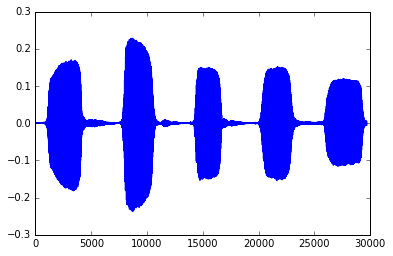

In [44]:
cellAudio = audio[cellBoundaries[5][0]:cellBoundaries[5][1]]
plt.plot(cellAudio)
wavPlayer(cellAudio,samplerate)